# Follow the link to visualize maps

http://nbviewer.jupyter.org/gist/mbanga9/813f53cdf7d33c05d2a1ce1c77efb8cd

In [1]:
import pandas as pd
import folium 
import seaborn
import json
# Used for downloading files:
import urllib
# Used for pretty choropleth maps
import jenkspy
# Numpy, Scipy, matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
folium.__version__ # make sure to have 0.5 !

'0.5.0'

# 01 - Unemployment in European countries

As stated on the Eurostat website, the unemployment rate is defined as:
>Unemployment rates represent unemployed persons as a percentage of the labour force. The labour force is the total number of people employed and unemployed. Unemployed persons comprise persons aged 15 to 74 who were: a. without work during the reference week, b. currently available for work, i.e. were available for paid employment or self-employment before the end of the two weeks following the reference week, c. actively seeking work, i.e. had taken specific steps in the four weeks period ending with the reference week to seek paid employment or self-employment or who found a job to start later, i.e. within a period of, at most, three months. This table does not only show unemployment rates but also unemployed in 1000 and as % of the total population.

Let's retrieve this data and get it into a `DataFrame`

In [3]:
#urllib.request.urlretrieve('http://ec.europa.eu/eurostat/tgm/web/_download/Eurostat_Table_tsdec450NoFlagNoDesc_f375eece-81ae-4fc9-b4ef-5ab165fe8c72.xls',
#                           'eurostat.xls')
na_values= [':', '(i)', '(p)']
df_eu = pd.read_excel('eurostat.xls', skiprows=range(3), skip_footer=9, 
                          na_values=na_values, header=0)
df_eu = df_eu.rename(columns={'geo\\time': 'country'})
print(df_eu.shape)
df_eu

(37, 28)


,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,EU (28 countries),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.2,7.0,9.0,9.6,9.7,10.5,10.9,10.2,9.4,8.6
1,EU (27 countries),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.2,7.0,9.0,9.6,9.6,10.4,10.8,10.2,9.4,8.5
2,Euro area (19 countries),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.5,7.6,9.6,10.2,10.2,11.4,12.0,11.6,10.9,10.0
3,Euro area (18 countries),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.5,7.6,9.6,10.1,10.1,11.4,12.0,11.6,10.9,10.0
4,Belgium,6.6,6.4,7.1,8.6,9.8,9.7,9.5,9.2,9.3,...,7.5,7.0,7.9,8.3,7.2,7.6,8.4,8.5,8.5,7.8
5,Bulgaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.9,5.6,6.8,10.3,11.3,12.3,13.0,11.4,9.2,7.6
6,Czech Republic,NaN,NaN,NaN,4.3,4.3,4.0,3.9,4.8,6.5,...,5.3,4.4,6.7,7.3,6.7,7.0,7.0,6.1,5.1,4.0
7,Denmark,7.2,7.9,8.6,9.6,7.7,6.7,6.3,5.2,4.9,...,3.8,3.4,6.0,7.5,7.6,7.5,7.0,6.6,6.2,6.2
8,Germany,NaN,5.5,6.6,7.8,8.4,8.2,8.9,9.6,9.4,...,8.5,7.4,7.6,7.0,5.8,5.4,5.2,5.0,4.6,4.1
9,Estonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.6,5.5,13.5,16.7,12.3,10.0,8.6,7.4,6.2,6.8


Let's try out the `topoJSON` file for Europe, by simply plotting a map with the outline of the countries

In [4]:
eu_topo_path = r'topojson/europe.topojson.json'
eu_json = json.load(open(eu_topo_path))

m_eu = folium.Map([51, 15], zoom_start=4)
folium.TopoJson(open(eu_topo_path),
                'objects.europe',
                name='topojson',
               ).add_to(m_eu)
m_eu

`Folium` interprets NaNs as 0 values and plots them onto our choropleth map if we don't remove them. Therefore, we'll remove any countries from our `eu_json` that don't have any data for our year of interest, 2016. Although we don't have the value for Switzerland in this dataset, data from amstat (this is calculated in 02 and used here) shows that the unemployment rate for switzerland in 2016 was 2.3. We have to be careful here to take the rate which doesn't include people whom are already employed, so that we compare similar data between the two sets. It is important to note that not signed up for chomage does not equal employed, as it is possible to be without a job and not sign up for the benefits. However, as there is no data on this in the amstat database and we want to compare it with eurostat, we'll assume that all people not signed up for chomage looking for a job are already employed.

As we've only got one value, we'll fill it in "by hand".

In [5]:
df_eu.loc[34,'2016'] = 2.3

# finding countries to remove
rm_countries = df_eu[df_eu['2016'].isnull()]['country'].tolist()
print(rm_countries) # this should now be an empty list, as we have 2016 data for all countries in our df

# removing all countries w/o 2016 data from eu_json, again shouldn't change anything
eu_json['objects']['europe']['geometries'][:] = [d for d in eu_json['objects']['europe']['geometries'] if d.get('properties').get('NAME') not in rm_countries]

[]


Furthermore, we have the same issue the other way round. ie. files defined in our `topoJSON` that are missing from our eurostat dataset will still be plotted on our choropleth categories, so we should remove these from the `topoJSON`:

In [6]:
geometries = []

c_json = []
for key in eu_json['objects']['europe']['geometries']:
    country = key['properties']['NAME']
    c_json.append(country)
    if country in list(df_eu['country']):
        geometries.append(key)
        
eu_json['objects']['europe']['geometries'] = geometries

After testing out different ways of choosing how to define classes for the choropleth maps we settle on jenks natural breaks. The way this method maximises the information shown and produces agreable maps without exceedingly high contrast were the two main selling points.

In [7]:
breaks = jenkspy.jenks_breaks(df_eu.loc[:,'2016'].dropna().values, nb_class=5)
m_europe = folium.Map(location=[46, 15], tiles='cartodbpositron', zoom_start =4)
m_europe.choropleth(geo_data=eu_json, data=df_eu,
                columns = ['country', '2016'],
                threshold_scale = breaks,
                key_on='feature.properties.NAME',
                topojson='objects.europe',
                fill_color='YlGn',
                fill_opacity=0.7,
                line_opacity=0.2,
                legend_name='Unemployment Rate (%)')

m_europe

Our map shows some nice distribution of unemployment. It seems the best-off countries are more in central Europe and to the North, with a peninsula of high employment reaching down to Switzerland. While Finland and Latvia are two striking exceptions with low unemployment in the North. Greece is leading the pack with the highest unemployment at 24%, while the next highest is way behind at 13%. Notice how the jenks breaks placed Greece in its own class, while having a separate one for Croatia and Spain, the next 2 countries with the highest unemployment.

# 02 - Unemployment in Swiss cantons
Let's make the same map as we first did, merely with the outlines of the cantons. Adding the `utf-8` encoding option may be needed on some systems

In [8]:
canton_topo_path = r'topojson/ch-cantons.topojson.json'
canton_json = json.load(open(canton_topo_path, encoding='utf-8'))

In [9]:
m_ch = folium.Map([47,8.3], zoom_start=8)

folium.TopoJson(open(canton_topo_path, encoding='utf-8'),
                'objects.cantons',
                name='topojson',
               ).add_to(m_ch)
m_ch

Let's now try to extract the data for use with the eurostat set. The swiss definition of unemployment is # seeking employment/active population. However, some of those seeking employment already have jobs or are not inscribed in the chomage, whereas in the eurostat data only those without jobs are accounted for. As previously mentioned, in order to compare with the eurostat data we'll assume that note being inscribed to chomage means already being employed.

In [10]:
io = 'ch_test.xlsx'
df_ch = pd.read_excel(io, skiprows=range(2), header=0)
df_ch = df_ch.drop([0])
df_ch = df_ch.loc[:, ['Région linguistique', 'Canton', 'Total', 'Total.1', 'Total.2', 'Total.3']] 
df_ch[['Total', 'Total.1', 'Total.2', 'Total.3']] = df_ch[['Total', 'Total.1', 'Total.2', 'Total.3']].astype('float64', copy=False, errors='ignore')

df_ch = df_ch.rename(columns={'Total.1':'# Registered unemployed', 'Total.2':'# Seeking employment', 'Total.3':'# Seeking w/o unemployment registration'})
df_ch['# Active population'] = df_ch['# Seeking employment'] / df_ch['Total'] *100
df_ch['Unemployment rate w/o non-registered'] = 100* df_ch['# Registered unemployed'] / df_ch['# Active population']
df_ch.tail()

,Région linguistique,Canton,Total,# Registered unemployed,# Seeking employment,# Seeking w/o unemployment registration,# Active population,Unemployment rate w/o non-registered
23,Suisse romande et Tessin,Valais,3.9,82474.0,126925.0,44451.0,3.254487e+06,2.534163
24,Suisse romande et Tessin,Neuchâtel,5.8,64382.0,86039.0,21657.0,1.483431e+06,4.340074
25,Suisse romande et Tessin,Genève,5.5,155582.0,199113.0,43531.0,3.620236e+06,4.297565
26,Suisse romande et Tessin,Jura,4.6,20341.0,28975.0,8634.0,6.298913e+05,3.229287
27,Total,NaN,3.3,1791804.0,2533166.0,741362.0,7.676261e+07,2.334215


The `topoJSON` for Switzerland uses canton ids, we'll have to add these before we can make a nice map:

In [11]:
ids = []
for canton in canton_json['objects']['cantons']['geometries']:
    ids.append(canton['id'])
    
# We just need to change order of canton ids so it's the same as in our df
ids.remove('FR')
ids.insert(19 ,'FR')
ids.insert(len(ids)+1, 'Not Applicable')
df_ch['ID'] = ids
df_ch.set_index('Canton', inplace=True)
df_ch.head()

,Région linguistique,Total,# Registered unemployed,# Seeking employment,# Seeking w/o unemployment registration,# Active population,Unemployment rate w/o non-registered,ID
Canton,,,,,,,,
Zurich,Suisse alémanique,3.7,361007.0,441431.0,80424.0,1.193057e+07,3.025900,ZH
Berne,Suisse alémanique,2.7,183398.0,241011.0,57613.0,8.926333e+06,2.054573,BE
Lucerne,Suisse alémanique,2.1,55221.0,89599.0,34378.0,4.266619e+06,1.294257,LU
Uri,Suisse alémanique,1.0,2418.0,4361.0,1943.0,4.361000e+05,0.554460,UR
Schwyz,Suisse alémanique,1.8,18446.0,27475.0,9029.0,1.526389e+06,1.208473,SZ


In [12]:
breaks = jenkspy.jenks_breaks(df_ch.loc[:,'Total'].dropna().values, nb_class=5)
m_switzerland = folium.Map(location=[47.1, 8.39], tiles='cartodbpositron', zoom_start =7)
m_switzerland.choropleth(geo_data=canton_json, data=df_ch,
                columns = ['ID', 'Total'],
                threshold_scale = breaks,
                key_on='feature.id',
                topojson='objects.cantons',
                fill_color='YlGn',
                fill_opacity=0.7,
                line_opacity=0.2,
                legend_name='Unemployment Rate Switzerland (%)')

m_switzerland

Looks like we haven't exactly gotten our feet in the best spot for finding a job. Most of the Swiss german cantons are better off, apart from Fribourg. It even looks as if the outer cantons are worse off than the central ones, or the Western worse than the Eastern ones, with the lowest unemployment nestled in the heart of Switzerland.

## 02.2 Only considering registered unemployed

We've already calculated the new unemployment rates without people that have jobs/not signed up for chomage. We just need to plot it now

In [13]:
breaks = jenkspy.jenks_breaks(df_ch.loc[:,'Unemployment rate w/o non-registered'].dropna().values, nb_class=5)
m_switzerland = folium.Map(location=[47.1, 8.39], tiles='cartodbpositron', zoom_start =7)
m_switzerland.choropleth(geo_data=canton_json, data=df_ch,
                columns = ['ID', 'Unemployment rate w/o non-registered'],
                threshold_scale = breaks,
                key_on='feature.id',
                topojson='objects.cantons',
                fill_color='YlGn',
                fill_opacity=0.7,
                line_opacity=0.2,
                legend_name='Unemployment Rate Switzerland (%)')

m_switzerland

We can still se overall East/West trend, while the outer/inner canton isn't so obvious now that Graubünden is one of the best cantons.

Let's see which cantons have the most pronounced difference in unemployment rates when we don't consider people already with employment.

Neuchatel has the biggest change when switching counting methods. We can actually see that the field is evened out a bit looking at our two previous choropleth maps, the range has gotten a smaller for the second one, from 1-5.8 to 0.6-4.3. But it's generally the cantons worse off that have the biggest difference. Maybe people with jobs trying to change all the time are destabilizing the market for those without jobs? 

In [14]:
df_ch['Difference in unemployment rates'] = df_ch['Total'] - df_ch['Unemployment rate w/o non-registered']

In [15]:
breaks = jenkspy.jenks_breaks(df_ch.loc[:,'Difference in unemployment rates'].dropna().values, nb_class=5)
m_switzerland = folium.Map(location=[47.1, 8.39], tiles='cartodbpositron', zoom_start =7)
m_switzerland.choropleth(geo_data=canton_json, data=df_ch,
                columns = ['ID', 'Difference in unemployment rates'],
                threshold_scale = breaks,
                key_on='feature.id',
                topojson='objects.cantons',
                fill_color='YlOrRd',
                fill_opacity=0.7,
                line_opacity=0.2,
                legend_name='Absolute difference in unemployment rates (% points)')

m_switzerland

# 03 Difference in unemployment between Swiss and foreign workers

Let us start with loading in our data, cleaning it and calculating the difference we're interested in

In [16]:
io = 'Unemployment_Rates_foreigners_CH_2016.xlsx'

df_foreign = pd.read_excel(io, skiprows=range(2), skip_footer=1, header=0)

df_foreign.drop(0, inplace=True)
df_foreign['Total'] = df_foreign['Total'].astype('float64', copy=False)

# Calculating the difference in unemployment between Swiss and foreigners
foreign_unemp = df_foreign[df_foreign.loc[:, 'Nationalité'] == 'Etrangers'].loc[:,'Total'].values
swiss_unemp = df_foreign[df_foreign.loc[:, 'Nationalité'] == 'Suisses'].loc[:,'Total'].values
foreign_diff = (foreign_unemp - swiss_unemp)

df_new = pd.DataFrame(df_foreign.loc[:,'Canton'].unique())
df_new = df_new.rename(columns={0:'Canton'})
df_new['% points difference wrt swiss'] = foreign_diff
df_new.head()

,Canton,% points difference wrt swiss
0,Zurich,3.2
1,Berne,4.5
2,Lucerne,3.2
3,Uri,3.6
4,Schwyz,2.7


Let's merge this into our main `DataFrame` for Switzerland `df_ch`, then make our choropleth map

In [17]:
df_ch = df_ch.reset_index().merge(df_new, on='Canton')
df_ch.set_index('Canton', inplace=True)
df_ch.head()

,Région linguistique,Total,# Registered unemployed,# Seeking employment,# Seeking w/o unemployment registration,# Active population,Unemployment rate w/o non-registered,ID,Difference in unemployment rates,% points difference wrt swiss
Canton,,,,,,,,,,
Zurich,Suisse alémanique,3.7,361007.0,441431.0,80424.0,1.193057e+07,3.025900,ZH,0.674100,3.2
Berne,Suisse alémanique,2.7,183398.0,241011.0,57613.0,8.926333e+06,2.054573,BE,0.645427,4.5
Lucerne,Suisse alémanique,2.1,55221.0,89599.0,34378.0,4.266619e+06,1.294257,LU,0.805743,3.2
Uri,Suisse alémanique,1.0,2418.0,4361.0,1943.0,4.361000e+05,0.554460,UR,0.445540,3.6
Schwyz,Suisse alémanique,1.8,18446.0,27475.0,9029.0,1.526389e+06,1.208473,SZ,0.591527,2.7


In [18]:
breaks = jenkspy.jenks_breaks(df_ch.loc[:,'% points difference wrt swiss'].dropna().values, nb_class=5)
m_switzerland = folium.Map(location=[47.1, 8.39], tiles='cartodbpositron', zoom_start =7)
m_switzerland.choropleth(geo_data=canton_json, data=df_ch,
                columns = ['ID', '% points difference wrt swiss'],
                threshold_scale = breaks,
                key_on='feature.id',
                topojson='objects.cantons',
                fill_color='YlOrRd',
                fill_opacity=0.7,
                line_opacity=0.2,
                legend_name='Absolute difference in unemployment between Swiss and foreign workers (% points)')

m_switzerland

The differences are quite striking, specifically that foreigners are systematically more unemployed in every single canton. You're at the biggest disadvantage in Jura as a foreigner. Interesting to note that the cantons with high unemployment aren't necessarily the ones with the biggest difference between Swiss and foreign workers. And that our small unemployment heaven in the center of Switzerland is also the least discriminating with respect to foreign workers, sounds like a good place to be for everyone

## 03.2 Difference between age groups
Let's combine this difference with foreigners with differences between age groups

In [19]:
io = 'Unemployment_Rates_age_CH_2016.xlsx'

df_age = pd.read_excel(io, skiprows=range(2), skip_footer=1, header=0)

df_age.drop(0, inplace=True)
df_age[['Total','Total.1']] = df_age[['Total','Total.1']].astype('float64', copy=False)
df_age = df_age.rename(columns={'Unnamed: 3':'Age Category', 'Total':'Unemployment rate', 'Total.1':'# Registered unemployed'})

df_age = df_age.loc[:,['Canton', 'Age Category', 'Unemployment rate', '# Registered unemployed']]
df_age = df_age.set_index(['Canton', 'Age Category'])
#df_age.set_index('Age Category')
df_age.head()

Unemployment rate  # Registered unemployed
Canton Age Category                                              
Zurich 15-24 ans                     4.1                  44537.0
       25-49 ans                     3.8                 230181.0
       50 ans et plus                3.1                  86289.0
Berne  15-24 ans                     2.9                  25333.0
       25-49 ans                     2.9                 107367.0

When looking at differences in age categories, we decided to compare the younger and older categories to the middle 25-49 years category. This way we get a clearer view of whether unemployment goes up or down in the extremes of age.

Keeping this in one main `DataFrame` for Switzerland can make things simpler:

In [20]:
df_age = df_age.unstack(level=1)
df_ch[df_age['Unemployment rate'].columns]=df_age['Unemployment rate']
df_ch['15-24 difference wrt 25-49'] = df_ch['15-24 ans'] - df_ch['25-49 ans']
df_ch['50+ difference wrt 25-49'] = df_ch['50 ans et plus'] - df_ch['25-49 ans']
df_ch.head()

,Région linguistique,Total,# Registered unemployed,# Seeking employment,# Seeking w/o unemployment registration,# Active population,Unemployment rate w/o non-registered,ID,Difference in unemployment rates,% points difference wrt swiss,15-24 ans,25-49 ans,50 ans et plus,15-24 difference wrt 25-49,50+ difference wrt 25-49
Canton,,,,,,,,,,,,,,,
Zurich,Suisse alémanique,3.7,361007.0,441431.0,80424.0,1.193057e+07,3.025900,ZH,0.674100,3.2,4.1,3.8,3.1,0.3,-0.7
Berne,Suisse alémanique,2.7,183398.0,241011.0,57613.0,8.926333e+06,2.054573,BE,0.645427,4.5,2.9,2.9,2.4,0.0,-0.5
Lucerne,Suisse alémanique,2.1,55221.0,89599.0,34378.0,4.266619e+06,1.294257,LU,0.805743,3.2,2.4,2.1,1.8,0.3,-0.3
Uri,Suisse alémanique,1.0,2418.0,4361.0,1943.0,4.361000e+05,0.554460,UR,0.445540,3.6,0.9,1.1,1.0,-0.2,-0.1
Schwyz,Suisse alémanique,1.8,18446.0,27475.0,9029.0,1.526389e+06,1.208473,SZ,0.591527,2.7,1.5,1.7,2.0,-0.2,0.3


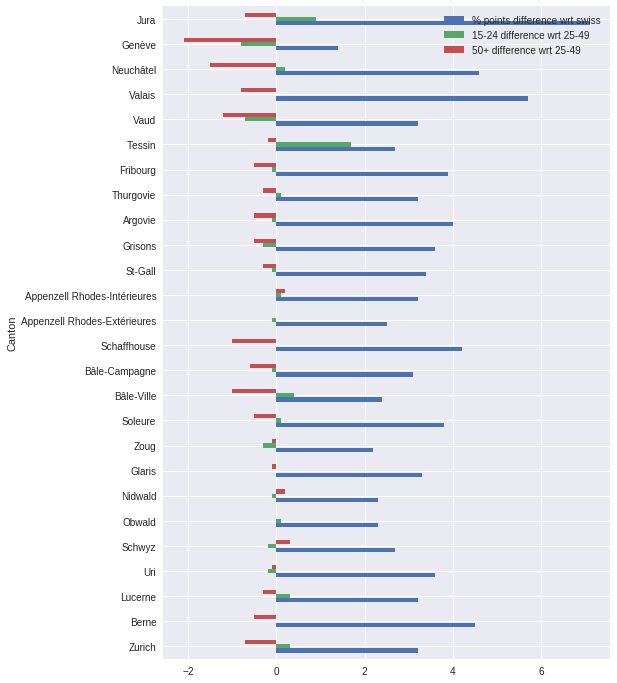

In [21]:
# make the default size for plots bigger
matplotlib.rcParams['figure.figsize'] = [8.0, 12.0]
col_to_plot = ['% points difference wrt swiss', '15-24 difference wrt 25-49', '50+ difference wrt 25-49']
df_ch[col_to_plot].plot.barh()

As we previously mentioned unemployment rate among foreigners is higher than that for Swiss in every single canton

However a little bit more surprising:
* In most cantons, the younger and the older generally enjoy lower unemployment rates than 25-49 year olds
* The two biggest exceptions are Tessin and Jura, where the young population have a much higher unemployment rate

So apparently it's good to be in the extremes, young and old populations are less unemployed in most cantons.

# 04 Bonus, difference over the Röstigraben

We observed that the classification of cantons into a linguistic region wasn't quite acurate in the datasets from amstat. As an example, the canton of Vaud is classified as 'Suisse romande et Tessin'. The same apply for Geneva and other Canton. 

To overcome this issue, we have decided to generate a new classification based on wikipedia information. From this new classification, only 3 cantons are mapped into 2 linguistic regions at the same time: Berne, Friboug and Valais.

We treat these three cantons as being part of a fourth linguistic region which marks boundary cantons between Romand and Swiss german. This makes sense as they a sort of mix between the Swiss and German speaking parts of Switzerland.

To visualize the differences between the linguistic regions (Suisse romande, Suisse alémanique, Tessin, Suisse romande et Suisse alémanique) we evaluate the mean of unemployment rates for each region. As a result, each canton within a given linguistic region has the same 'region' unemployement rate associated to it.

In [22]:
io = 'regions.xlsx'
regions = pd.read_excel(io, header=0, dtype=str)
regions

,Région linguistique,Canton
0,Suisse alémanique,Zurich
1,Suisse alémanique et Suisse romande,Berne
2,Suisse alémanique,Lucerne
3,Suisse alémanique,Uri
4,Suisse alémanique,Schwyz
5,Suisse alémanique,Obwald
6,Suisse alémanique,Nidwald
7,Suisse alémanique,Glaris
8,Suisse alémanique,Zoug
9,Suisse alémanique,Soleure


In [23]:
# Modify the the column 'Région linguistic' according to wikipedia classification
df_ch['Région linguistique'] = list(regions['Région linguistique'])

# Evaluate the mean of unemployment rates for each linguistic region  
df_rostigraben = df_ch.groupby('Région linguistique')['Total'].mean()

# for each canton, associate the mean of its linguistic region 
df_ch['rostigraben rate %'] = [df_rostigraben.loc[rl] for rl in df_ch['Région linguistique'].values]

breaks = jenkspy.jenks_breaks(df_ch.loc[:,'rostigraben rate %'].dropna().values, nb_class=4)
m_rostigraben = folium.Map(location=[47.1, 8.39], tiles='cartodbpositron', zoom_start =7)
m_rostigraben.choropleth(geo_data=canton_json, data=df_ch,
                columns = ['ID', 'rostigraben rate %'],
                threshold_scale = breaks,
                key_on='feature.id',
                topojson='objects.cantons',
                fill_color='YlOrRd',
                fill_opacity=0.7,
                line_opacity=0.2,
                legend_name='Unmployment rate by linguistic regions')

m_rostigraben

As shown by the previous map, cantons from the French speaking part of Switzerland have a highest unemployement rate than for other linguistic regions. This enforces the 'cliché' that German speakers are more prone to work than people from the latin culture, at least if we look at unemployment rates. It also seems the boundary cantons are sitting in the middle with intermediate unemployment in relation either side of the Röstigraben. The Tessin is also in its own region, somewhere between the Romand and boundary cantons. We'll notice that we conserve the East/Weast trend that we previously observed when looking on a per-canton basis. 